**Loading Data**

In [2]:
# Import tutto quanto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [3]:
# LOADING DATA

df=pd.read_csv("ICU_Challenge_Dataset.csv", sep=",")
df_description = df.describe()
columns = df.columns
columns
#df_description['percentage'] = df_description['count']/6000

Index(['recordid', 'SAPS-I', 'SOFA', 'In-hospital_death', 'Age', 'Gender',
       'Height', 'Weight', 'CCU', 'CSRU',
       ...
       'Platelets_last', 'TroponinI_last', 'TroponinT_last', 'WBC_last',
       'Weight_last', 'pH_last', 'MechVentStartTime', 'MechVentDuration',
       'MechVentLast8Hour', 'UrineOutputSum'],
      dtype='object', length=121)

In [4]:
# DUPLICATES

df.duplicated().any()

False

**Missing data exploration**

In [5]:
# MISSING DATA - da esplorare
# print(df[df.columns[df.isna().any()]])
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)
#print(df[df.columns[df.isna().any()]].isna().sum())


                         column_name  percent_missing
recordid                    recordid         0.000000
SAPS-I                        SAPS-I         0.000000
SOFA                            SOFA         0.000000
In-hospital_death  In-hospital_death         0.000000
Age                              Age         0.000000
...                              ...              ...
TroponinT_first      TroponinT_first        77.766667
Cholesterol_last    Cholesterol_last        92.133333
Cholesterol_first  Cholesterol_first        92.133333
TroponinI_last        TroponinI_last        95.250000
TroponinI_first      TroponinI_first        95.250000

[121 rows x 2 columns]


In [6]:
# Dropping data with missing percentage > 50
df_col_keep = missing_value_df[missing_value_df['percent_missing']<50]
df_col = df_col_keep['column_name']

df=df[df_col]
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,CCU,CSRU,SICU,Gender,BUN_first,...,Weight_first,FiO2_last,FiO2_first,MechVentDuration,MechVentStartTime,UrineOutputSum,MechVentLast8Hour,Lactate_first,Lactate_last,Height
0,132539,6,1,0,54.0,0,0,1,0.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,0,1,0,1.0,16.0,...,80.6,0.40,1.0,360.0,71.0,5.0,0.0,NaN,NaN,175.3
2,132541,21,11,0,44.0,0,0,0,0.0,8.0,...,56.7,0.40,1.0,2160.0,617.0,14.0,1.0,1.3,0.9,NaN
3,132543,7,1,0,68.0,0,0,0,1.0,23.0,...,84.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.3
4,132545,17,2,0,88.0,0,0,0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,0,0,1,1.0,11.0,...,NaN,0.40,0.6,2440.0,238.0,17.0,1.0,NaN,NaN,NaN
5996,151383,13,2,0,90.0,1,0,0,0.0,20.0,...,72.9,1.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,157.5
5997,149623,12,9,0,72.0,1,0,0,0.0,62.0,...,NaN,0.35,0.5,1200.0,188.0,10.0,0.0,1.4,1.4,NaN
5998,145366,18,11,1,52.0,0,0,0,1.0,16.0,...,95.9,0.50,1.0,2760.0,100.0,27.0,1.0,9.9,8.2,182.9


(array([5162.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         838.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

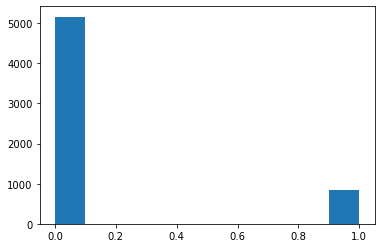

In [7]:
# TARGET VARIABLE

#print(df['In-hospital_death'].value_counts())

df['In-hospital_death'].unique()
fig, ax = plt.subplots()
ax.hist(df['In-hospital_death'])

# How to treat target unbalanced dataset - ! we need to give more importance to the correct detection of positive cases
# I would NOT create synthetic data, because we are not expert in the field enough to do that and it is too much detailed data 
# I would NOT downsample 

# https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/

# CONCETTI TOP: 
# In cost-sensitive learning instead of each instance being either correctly or incorrectly classified, 
# each class (or instance) is given a misclassification cost. Thus, instead of trying to optimize the accuracy, 
# the problem is then to minimize the total misclassification cost.
# Most classifiers assume that the misclassification costs (false negative and false positive cost) are the same.à  
# In most real-world applications, this assumption is not true.

# Cost-Sensitive Algorithms
# Machine learning algorithms are rarely developed specifically for cost-sensitive learning.

# Instead, the wealth of existing machine learning algorithms can be modified to make use of the cost matrix.
# This might involve a modification that is unique to each algorithm and which can be quite time consuming 
# to develop and test. Many such algorithm-specific augmentations have been proposed for popular algorithms, 
# like decision trees and support vector machines.

# Among all of the classifiers, induction of cost-sensitive decision trees has arguably gained the most attention.

# all to use with class_weight parameter 

#SVC
#DecisionTreeClassifier
#LogisticRegression
#RidgeClassifier
#The Keras Python Deep Learning 


**Univariate analysis** 

Observing standalone variables

In [8]:
# Variable type categorical / numerical

print(np.unique(df.dtypes))

int_var = list(df.columns[df.dtypes == np.int64])
float_var = list(df.columns[df.dtypes == np.float64])

cat_var = []
num_var = []
for cat in list(df.columns):
    if len(df[cat].unique()) <=3: #conta anche i Nan come valori
        cat_var.append(cat)
    else:
        num_var.append(cat)

categorical_df = df[cat_var]
numerical_df = df[num_var]


[dtype('int64') dtype('float64')]


**Categorical data analysis**

array([[<AxesSubplot:title={'center':'In-hospital_death'}>,
        <AxesSubplot:title={'center':'CCU'}>],
       [<AxesSubplot:title={'center':'CSRU'}>,
        <AxesSubplot:title={'center':'SICU'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'MechVentLast8Hour'}>]], dtype=object)

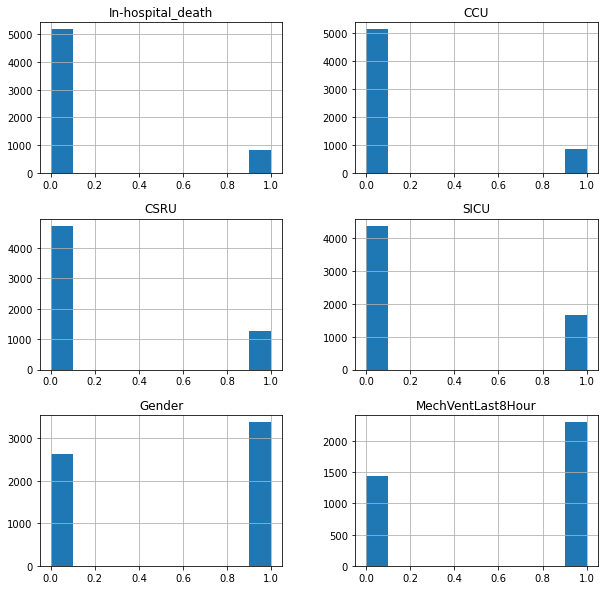

In [9]:
categorical_df.hist(figsize=(10,10))

<function matplotlib.pyplot.show(close=None, block=None)>

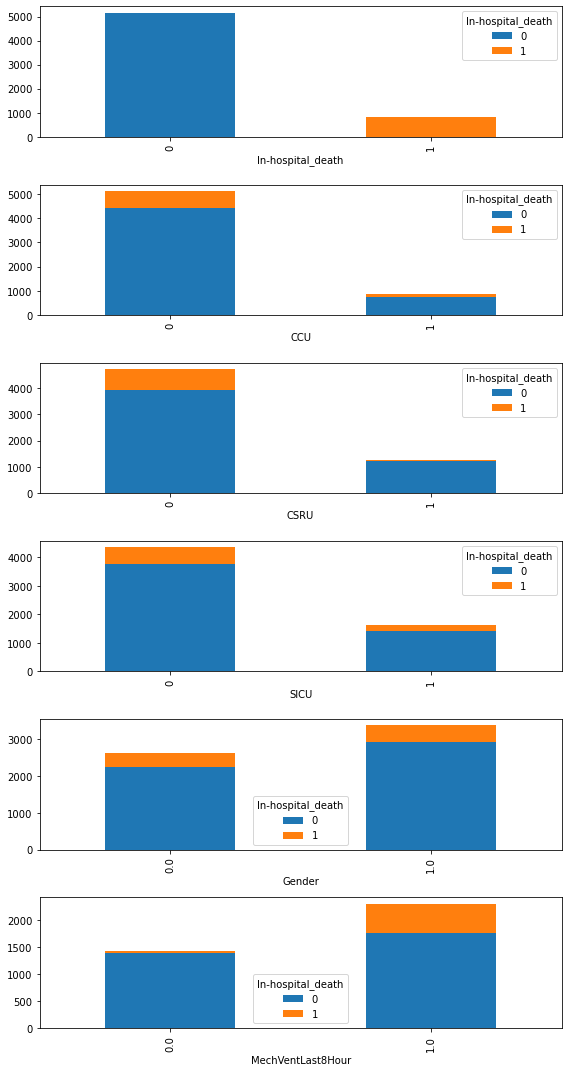

In [10]:
# Bivariate analysis of categorical variables:
# Who is CSRU for example is very unlikely to die 
# Opposite for who had mechanical ventilation within the last 8 hours
# The gender variable has quite a balanced subdivision, so it is probably not so relevant 

fig, ax = plt.subplots(nrows=6)
for c, col in enumerate(list(categorical_df.columns)): 
    clarity_color_table = pd.crosstab(index=categorical_df[col], 
                              columns=categorical_df["In-hospital_death"])

    clarity_color_table.plot(kind="bar", 
                     figsize=(8,15),
                     stacked=True, ax=ax[c], xlabel=col)
fig.tight_layout()
plt.show

**Numerical data analysis**

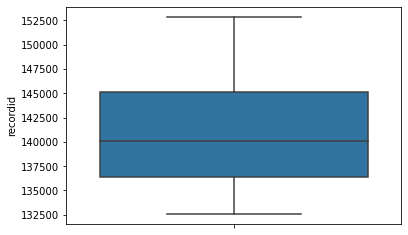

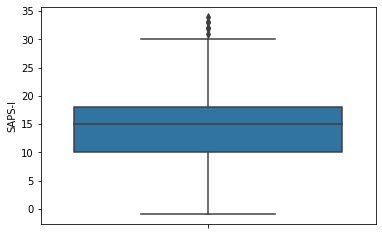

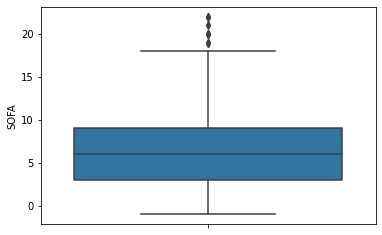

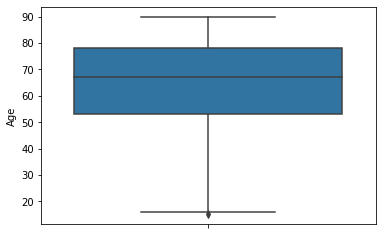

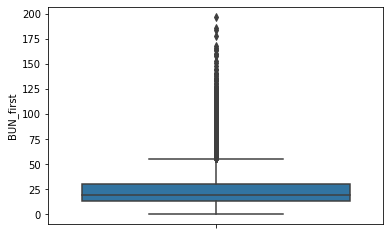

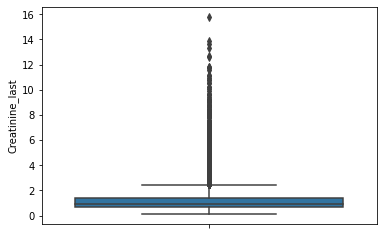

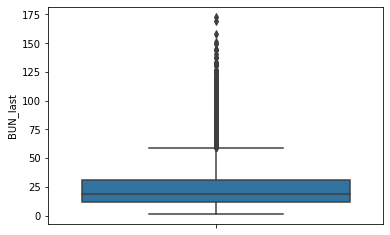

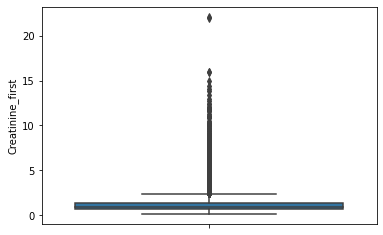

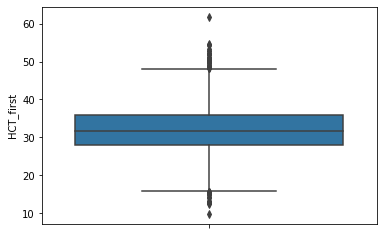

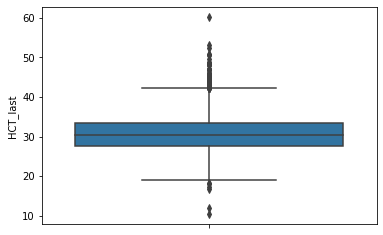

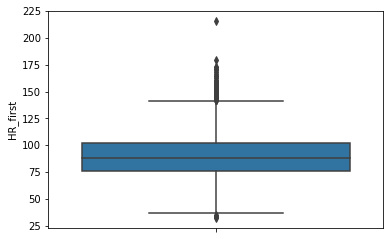

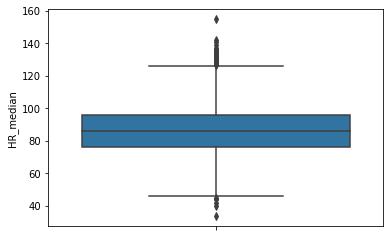

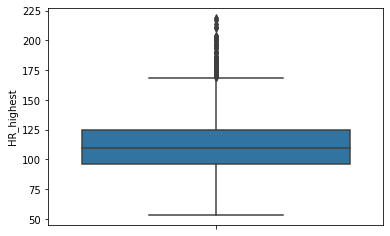

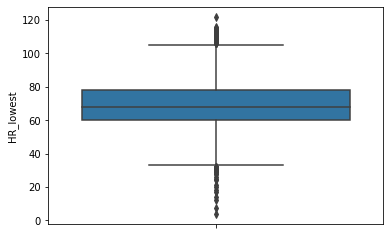

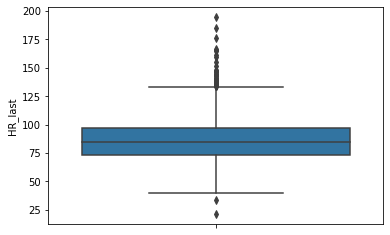

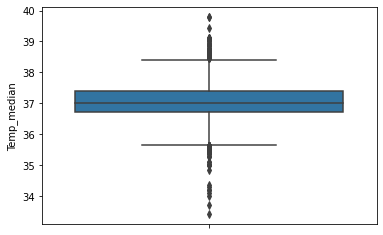

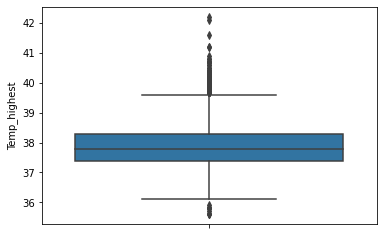

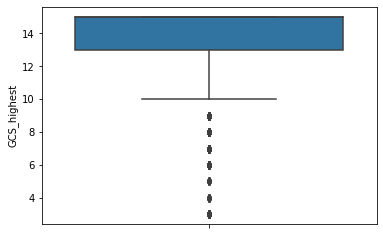

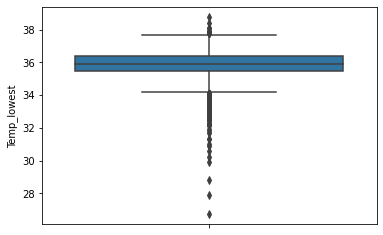

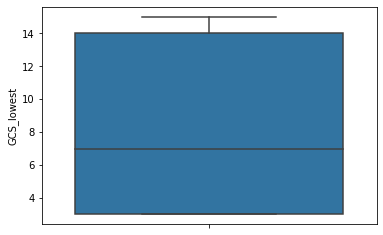

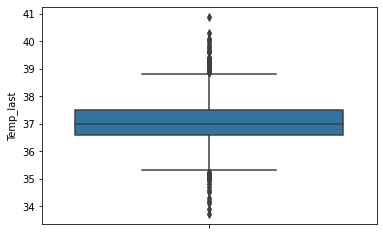

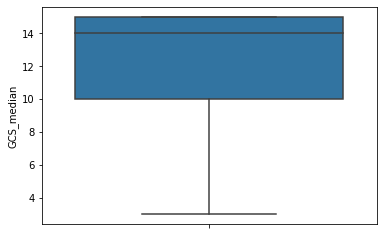

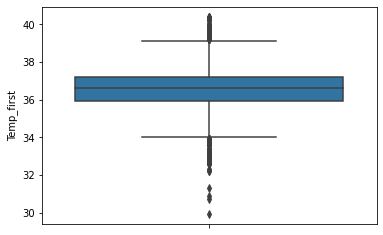

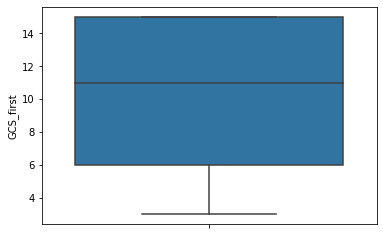

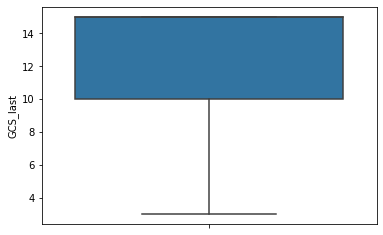

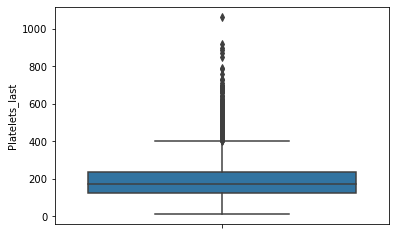

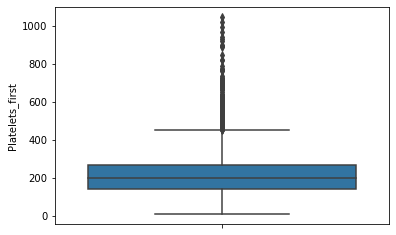

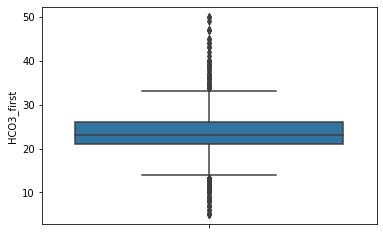

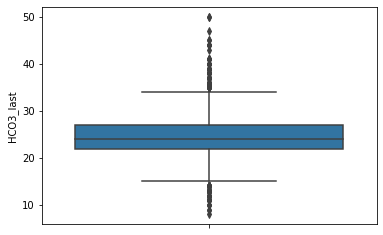

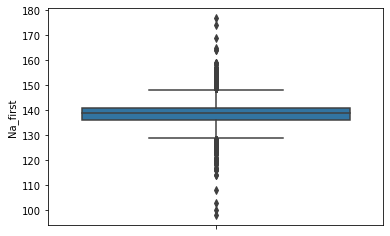

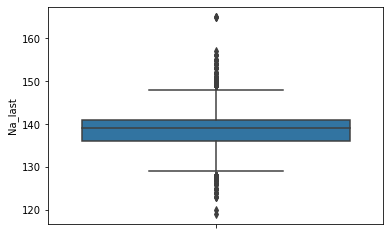

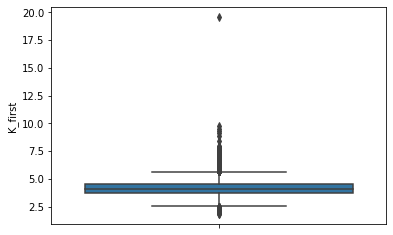

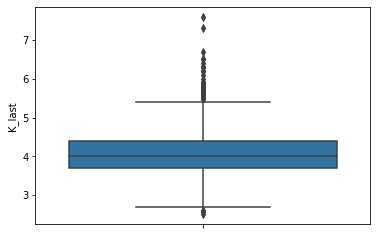

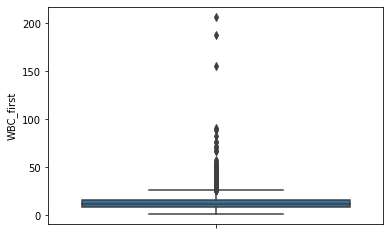

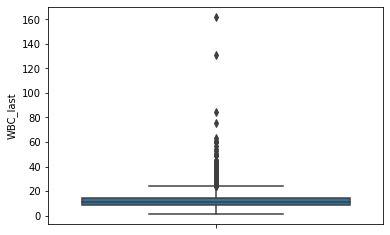

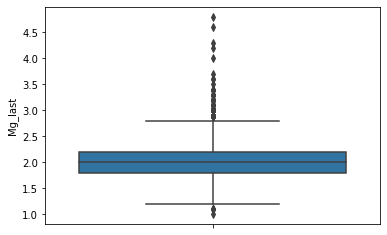

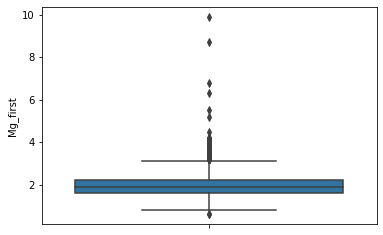

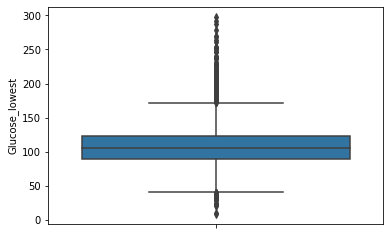

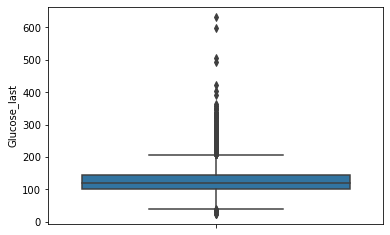

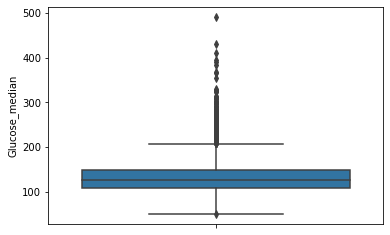

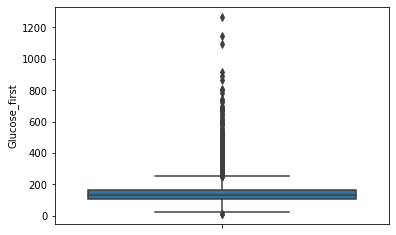

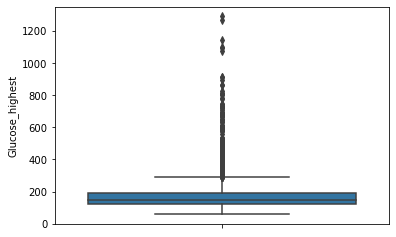

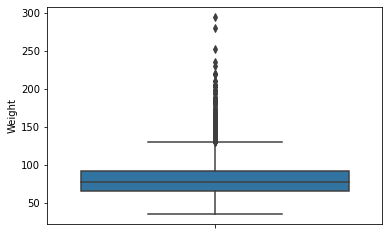

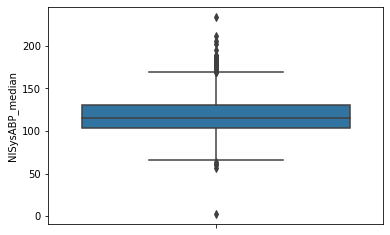

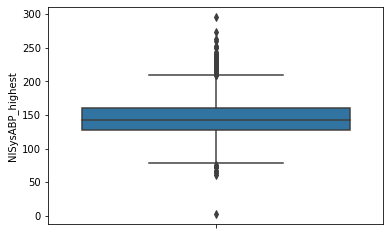

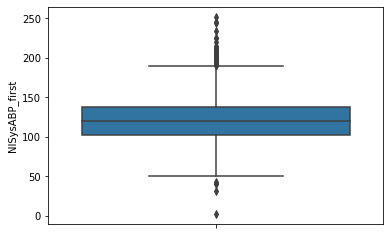

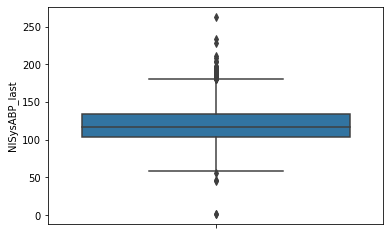

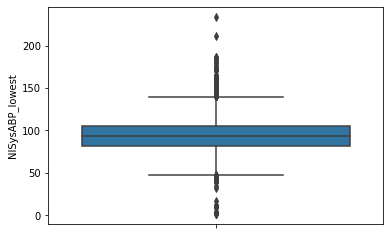

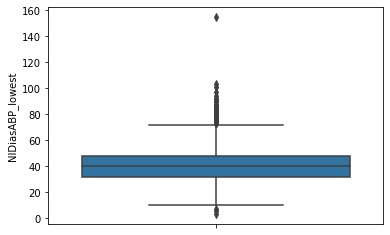

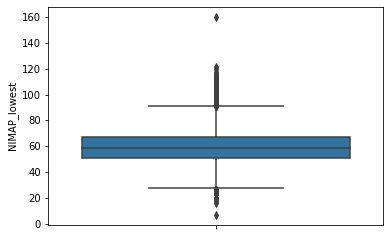

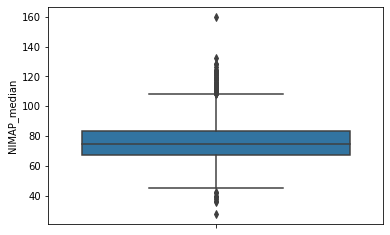

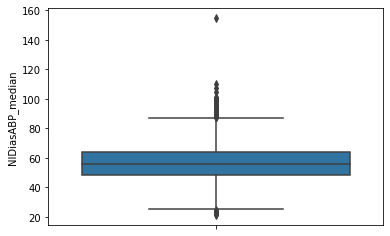

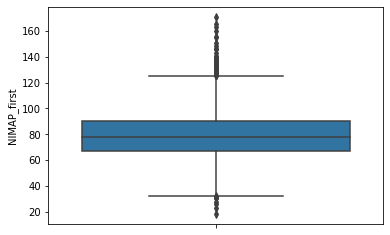

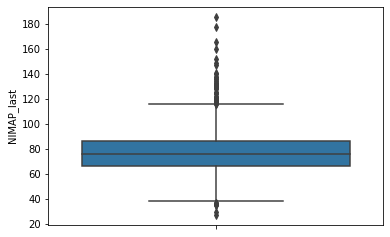

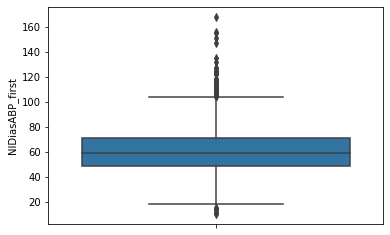

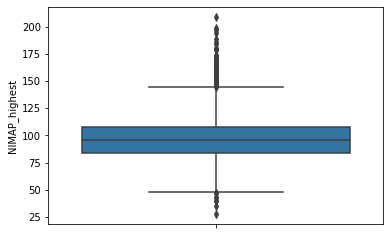

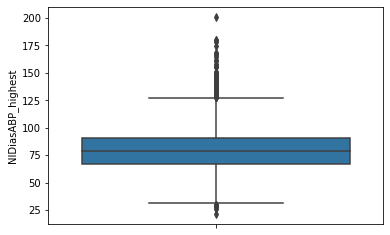

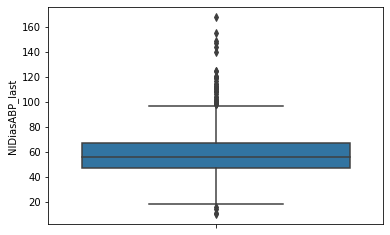

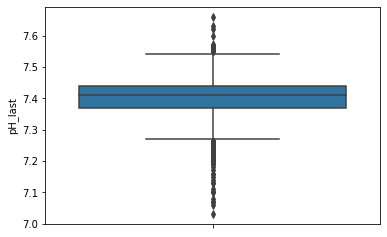

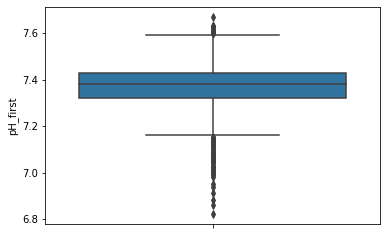

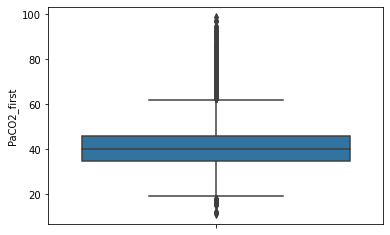

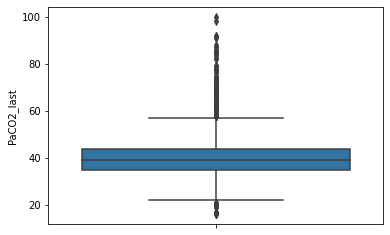

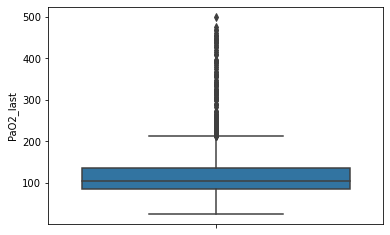

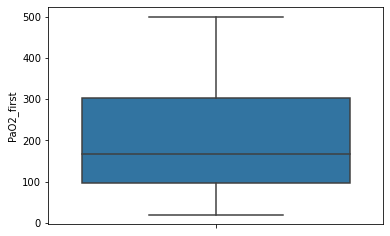

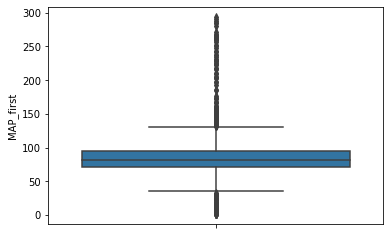

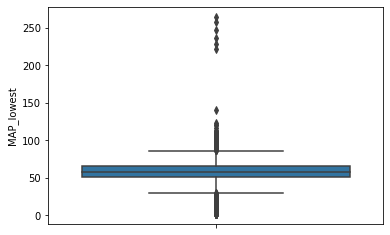

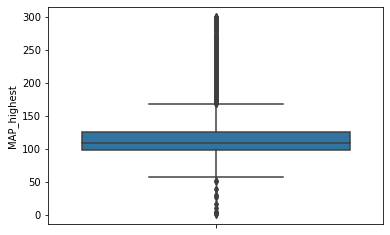

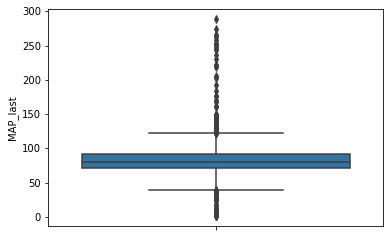

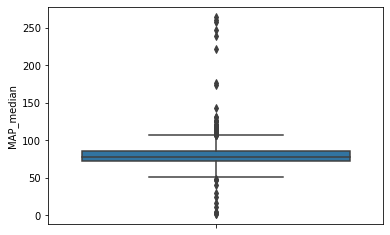

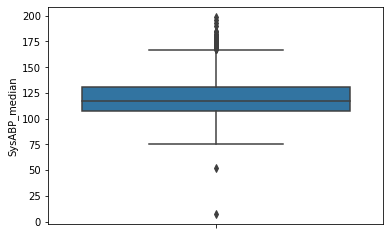

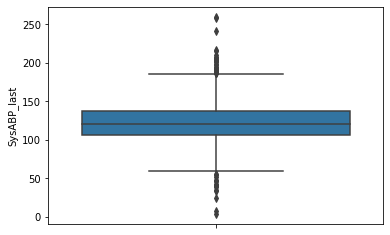

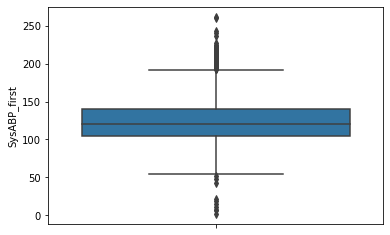

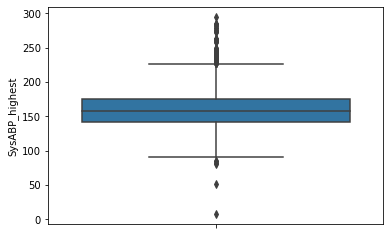

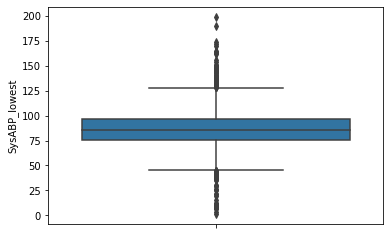

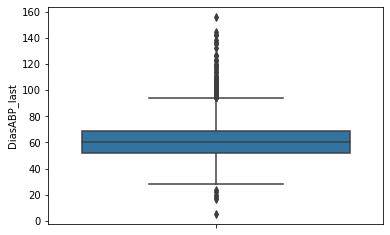

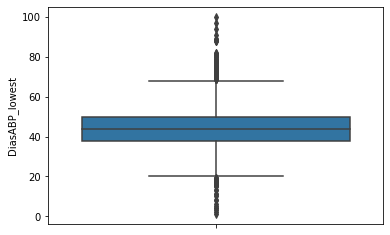

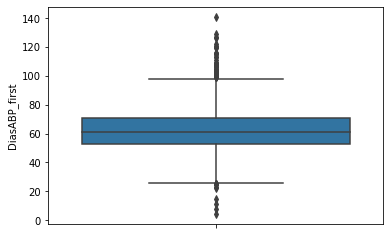

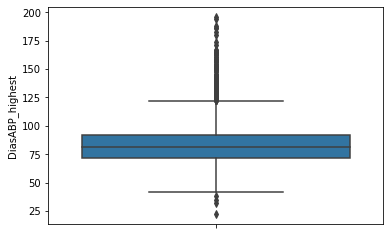

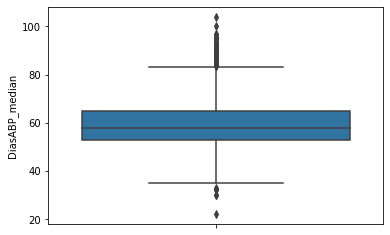

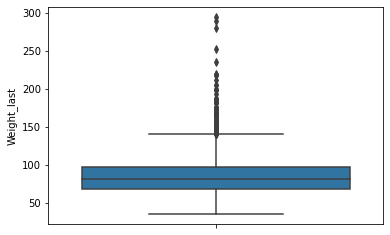

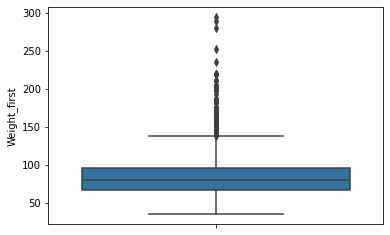

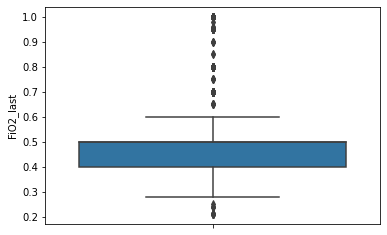

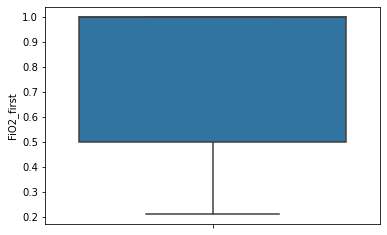

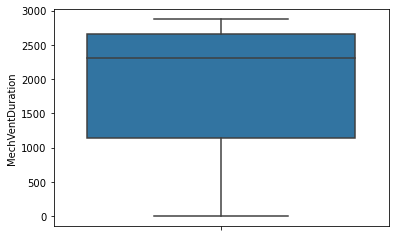

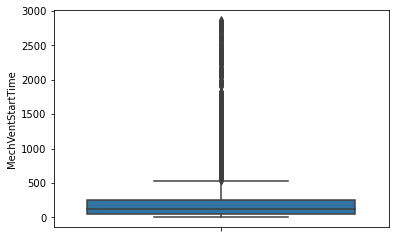

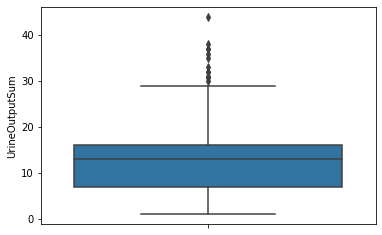

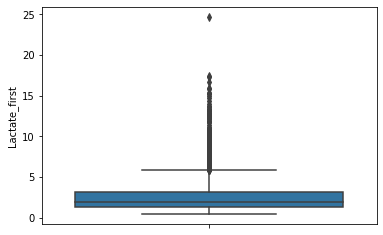

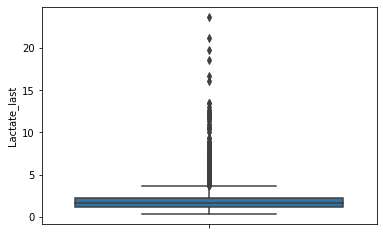

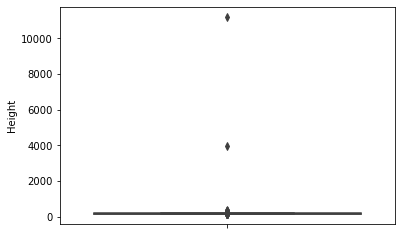

In [11]:
# Plotting outliers
import seaborn as sns
for col in list(numerical_df):
    sns.boxplot(y=numerical_df[col])
    plt.show()

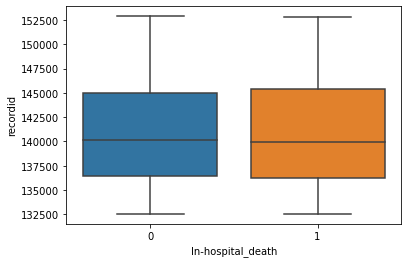

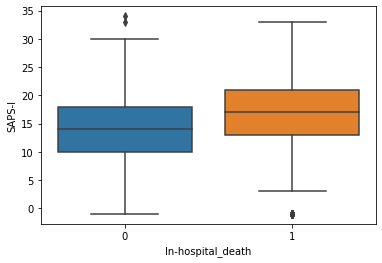

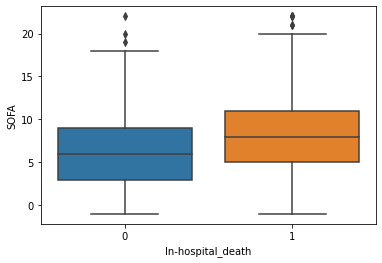

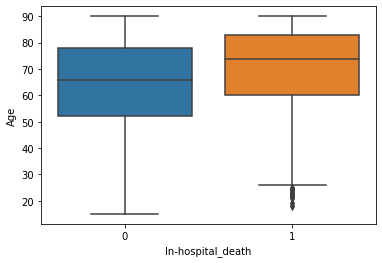

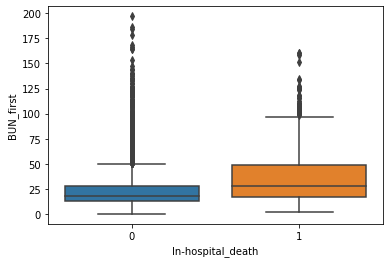

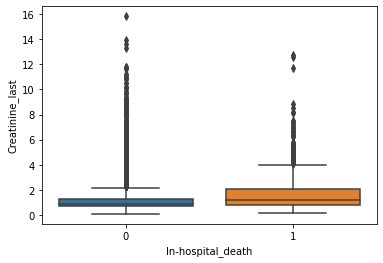

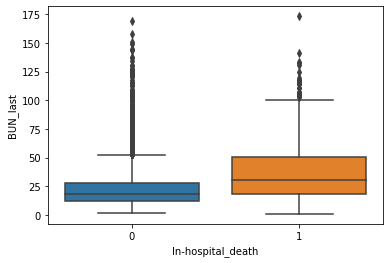

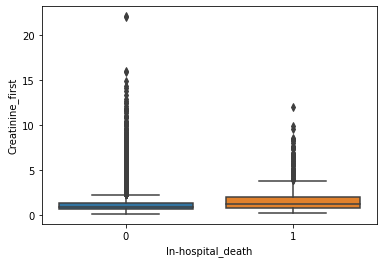

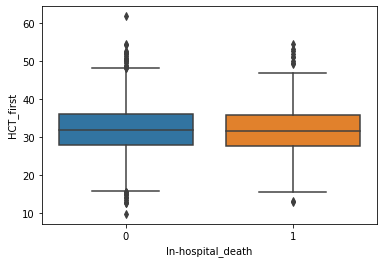

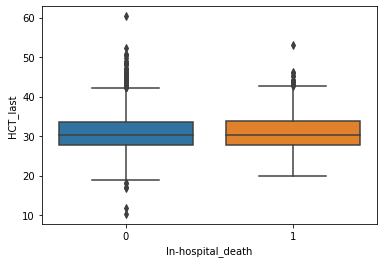

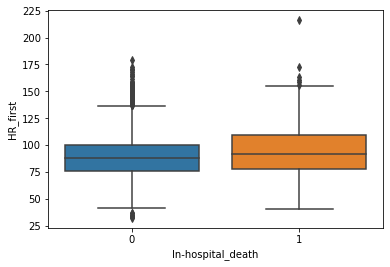

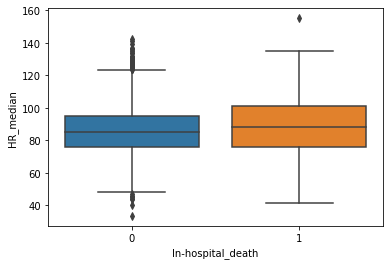

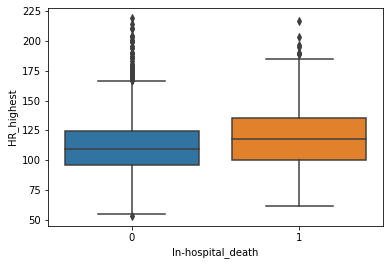

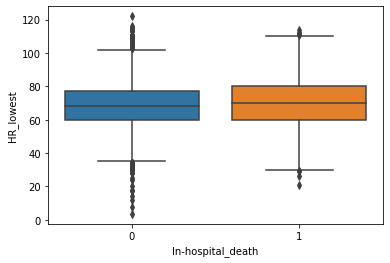

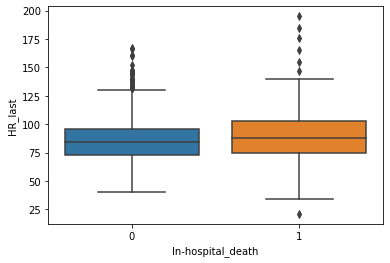

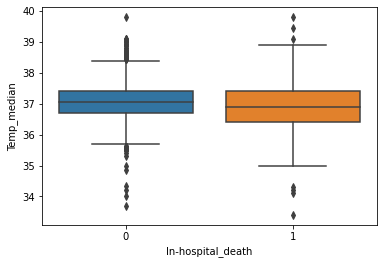

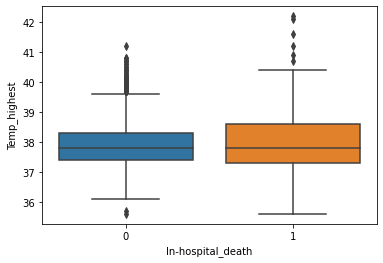

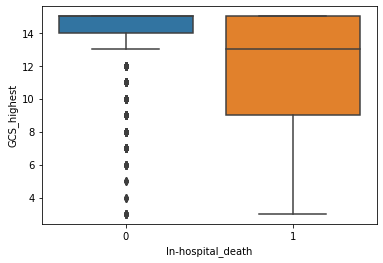

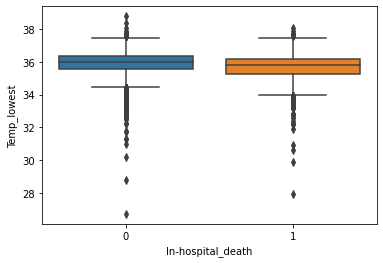

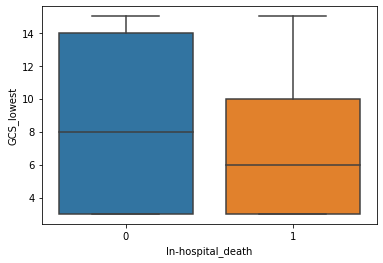

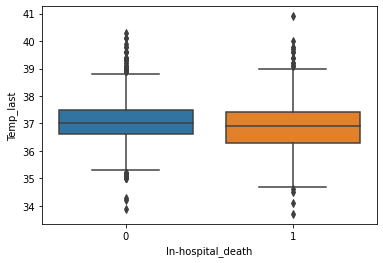

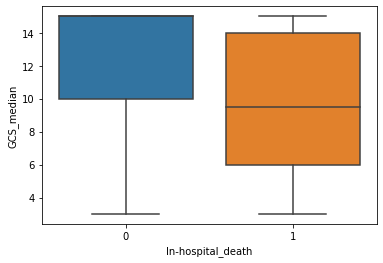

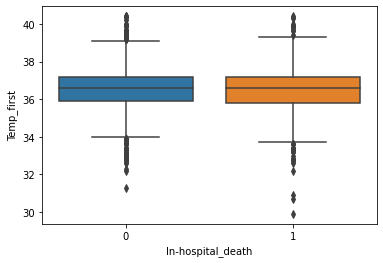

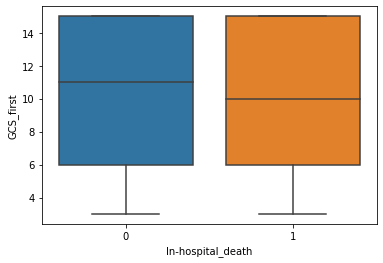

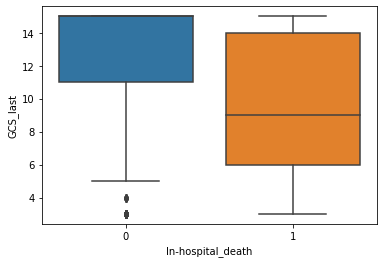

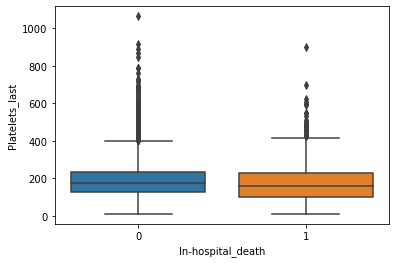

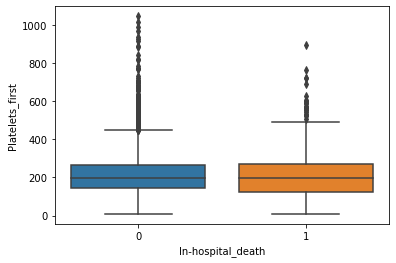

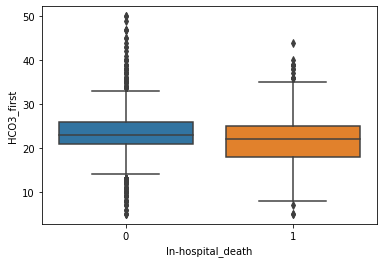

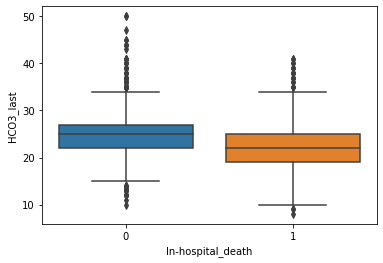

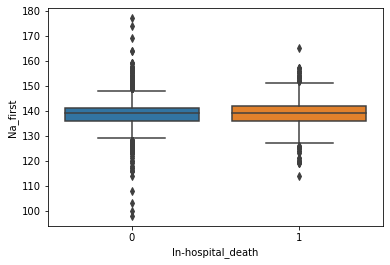

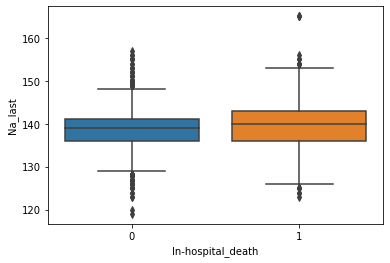

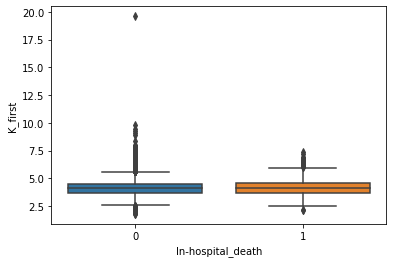

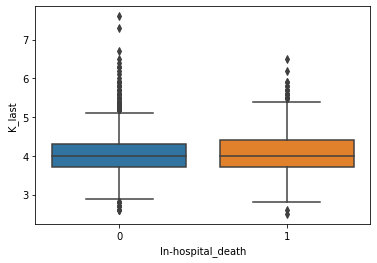

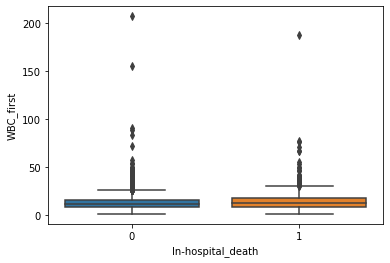

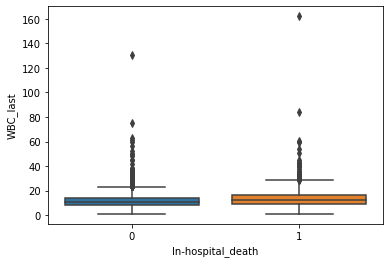

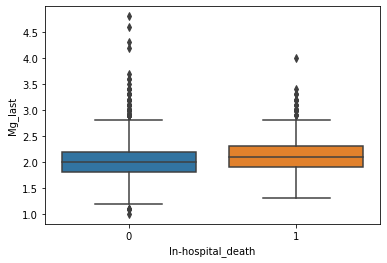

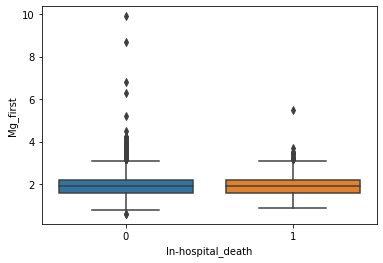

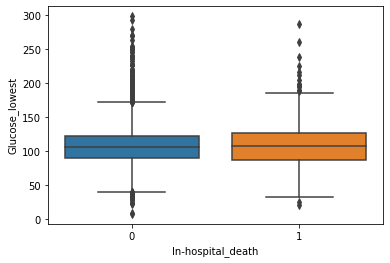

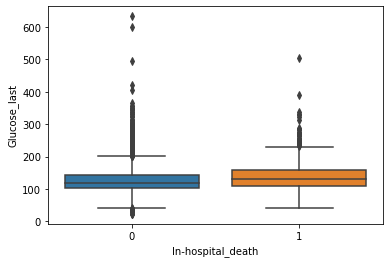

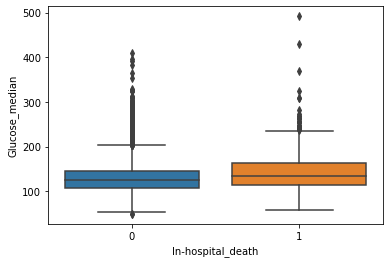

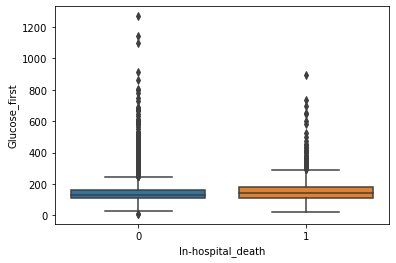

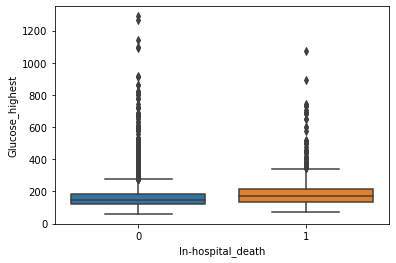

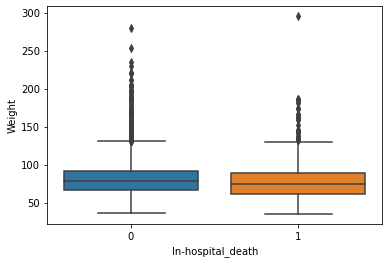

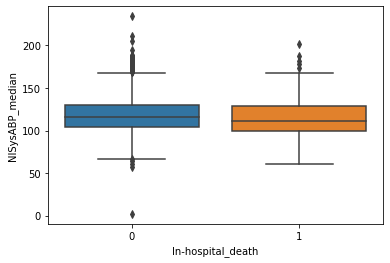

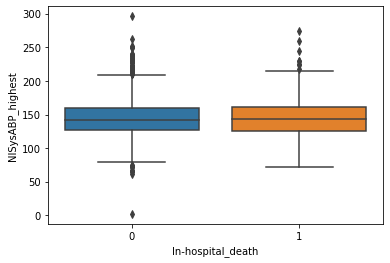

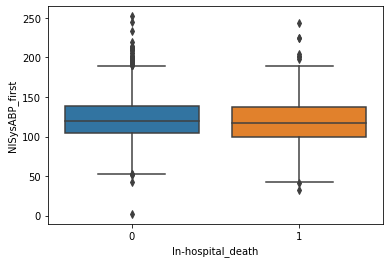

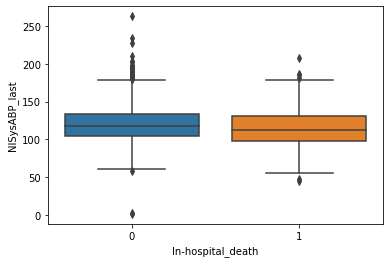

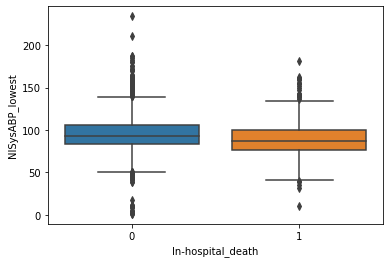

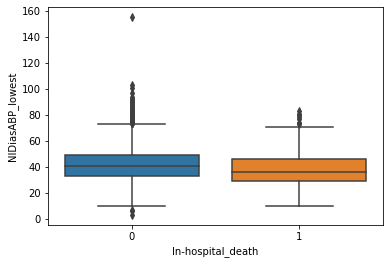

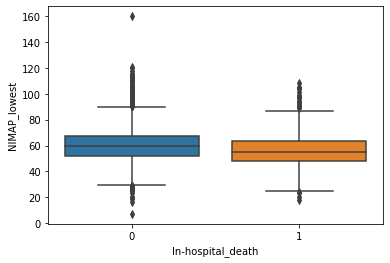

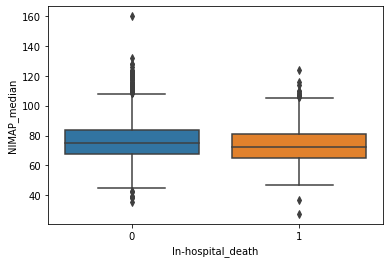

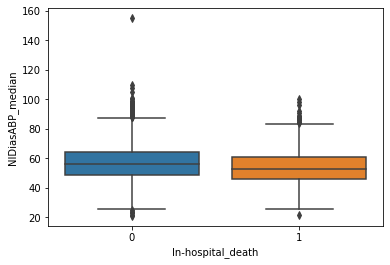

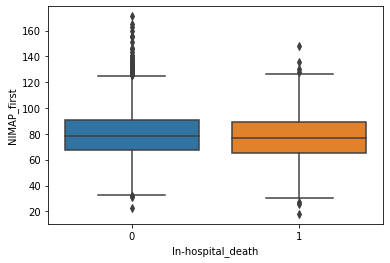

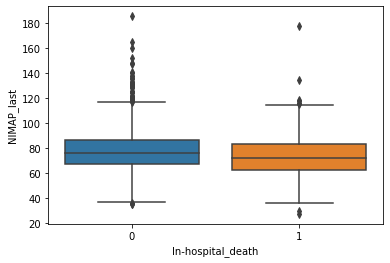

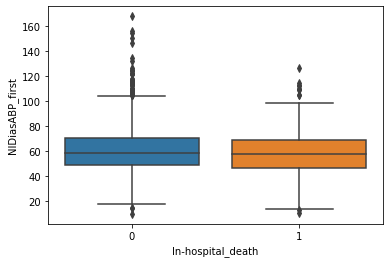

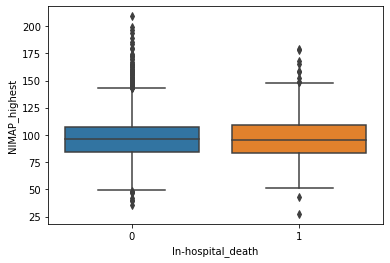

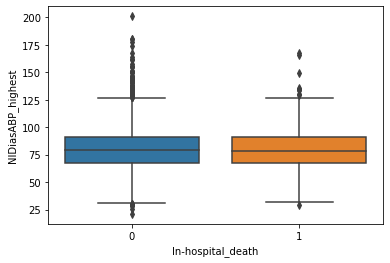

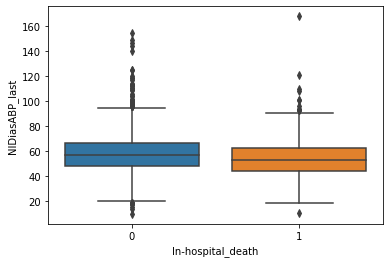

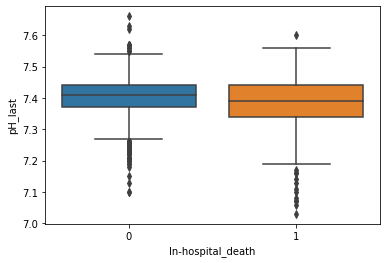

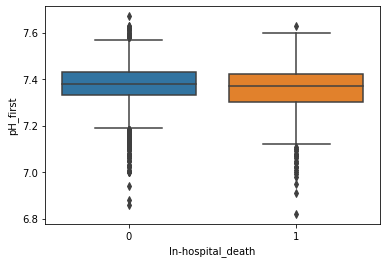

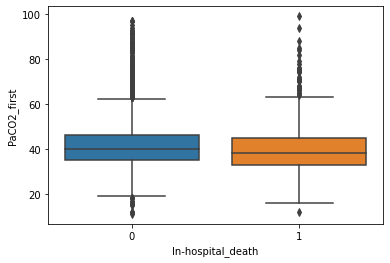

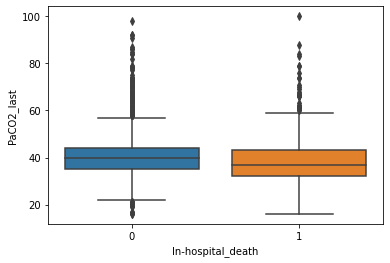

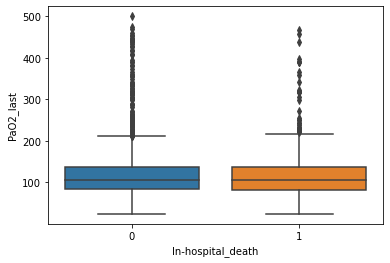

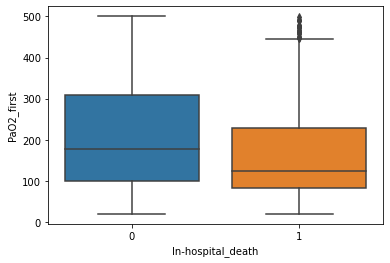

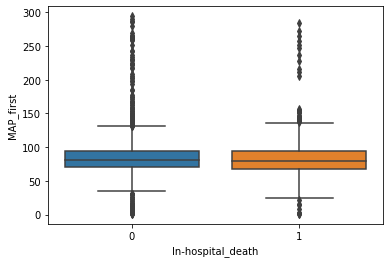

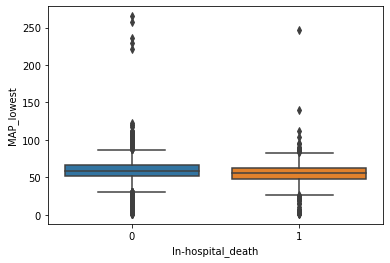

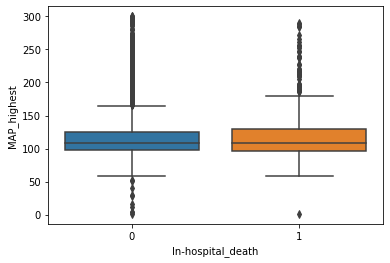

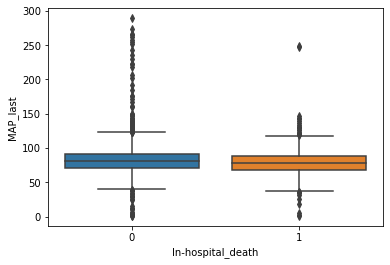

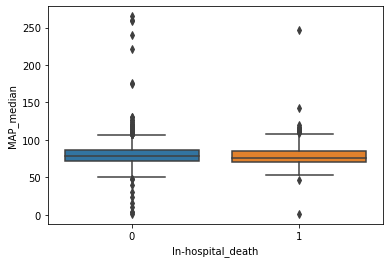

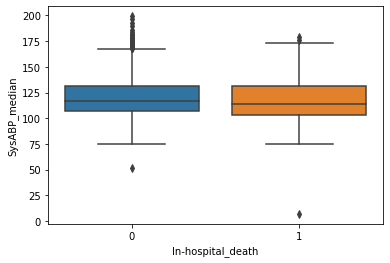

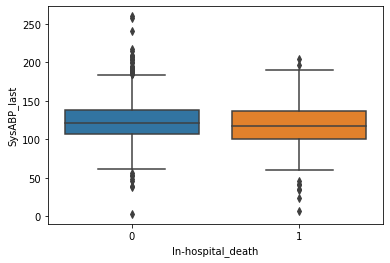

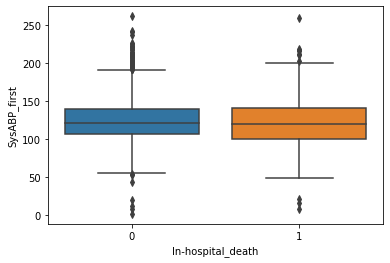

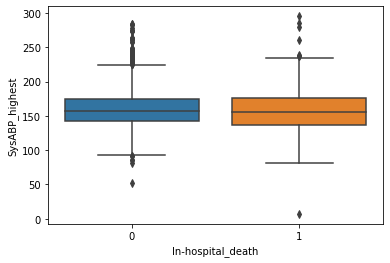

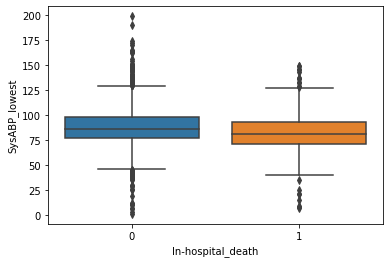

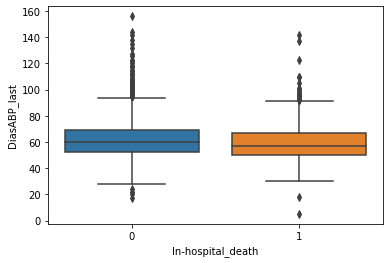

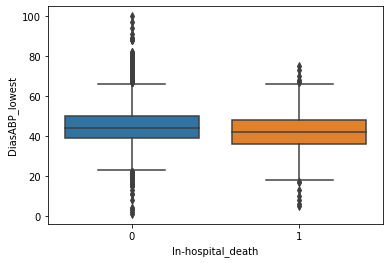

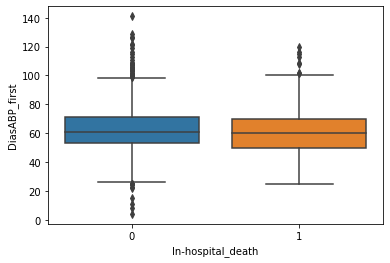

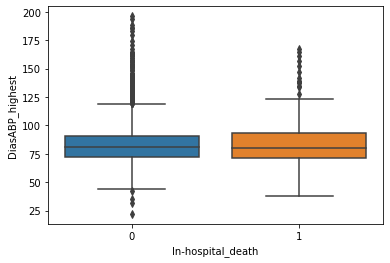

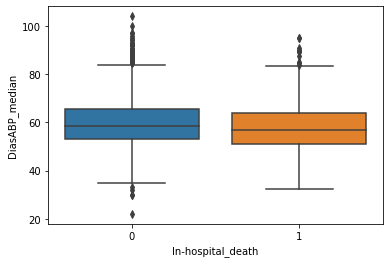

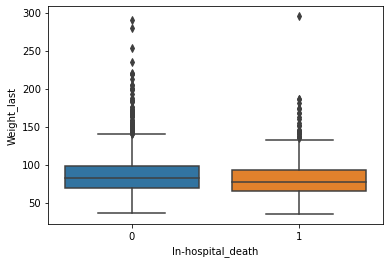

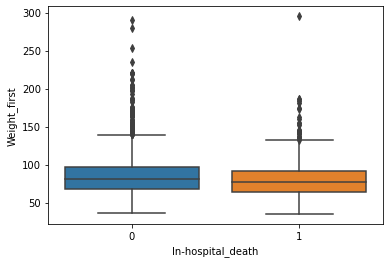

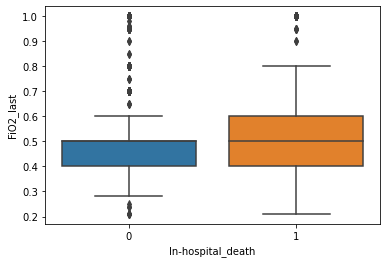

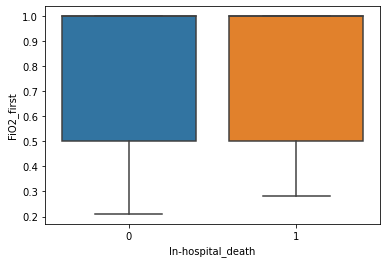

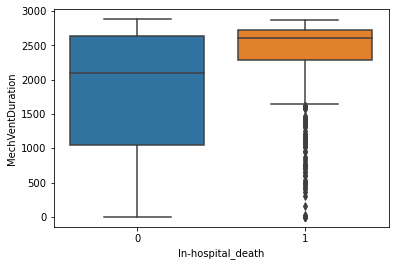

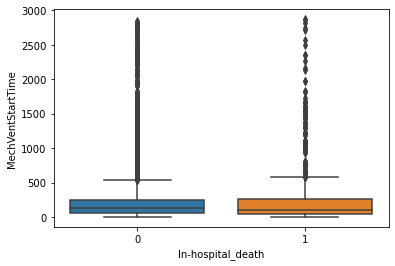

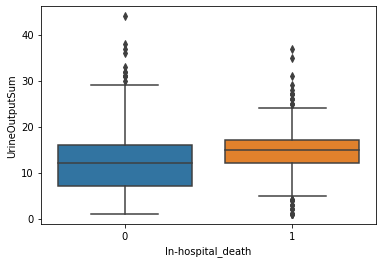

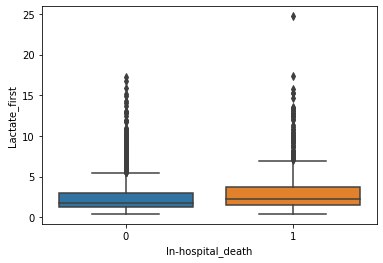

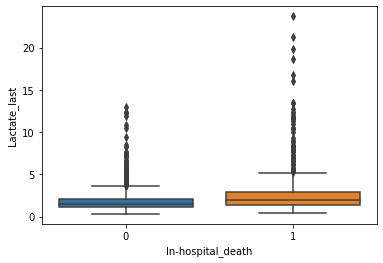

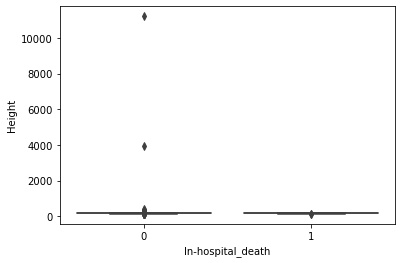

In [12]:
#Comparison boxplot per target
import seaborn as sns
for col in list(numerical_df):
    sns.boxplot(x=categorical_df['In-hospital_death'], y=numerical_df[col])
    plt.show()

In [13]:
# Dividing numerical variables that have a matched pair first/last
col_first = []
col_last = []
col_single = []
for x in list(numerical_df.columns): 
    if 'first' in x: 
        col_first.append(x)
    elif 'last' in x: 
        col_last.append(x)
    else: 
        col_single.append(x)
col_first.sort()
col_last.sort()
print(col_first)
print(col_last)
print(len(col_first))


print(df[col_first].shape)
df_first_last = pd.concat([df[col_first], df[col_last]], axis=1)
df_numerical_single = df[col_single]
# print(df_first_last.head())
# print(df_first_last.shape)
# sns.pairplot(numerical_df)


['BUN_first', 'Creatinine_first', 'DiasABP_first', 'FiO2_first', 'GCS_first', 'Glucose_first', 'HCO3_first', 'HCT_first', 'HR_first', 'K_first', 'Lactate_first', 'MAP_first', 'Mg_first', 'NIDiasABP_first', 'NIMAP_first', 'NISysABP_first', 'Na_first', 'PaCO2_first', 'PaO2_first', 'Platelets_first', 'SysABP_first', 'Temp_first', 'WBC_first', 'Weight_first', 'pH_first']
['BUN_last', 'Creatinine_last', 'DiasABP_last', 'FiO2_last', 'GCS_last', 'Glucose_last', 'HCO3_last', 'HCT_last', 'HR_last', 'K_last', 'Lactate_last', 'MAP_last', 'Mg_last', 'NIDiasABP_last', 'NIMAP_last', 'NISysABP_last', 'Na_last', 'PaCO2_last', 'PaO2_last', 'Platelets_last', 'SysABP_last', 'Temp_last', 'WBC_last', 'Weight_last', 'pH_last']
25
(6000, 25)


/usr/local/anaconda3/envs/Lab/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


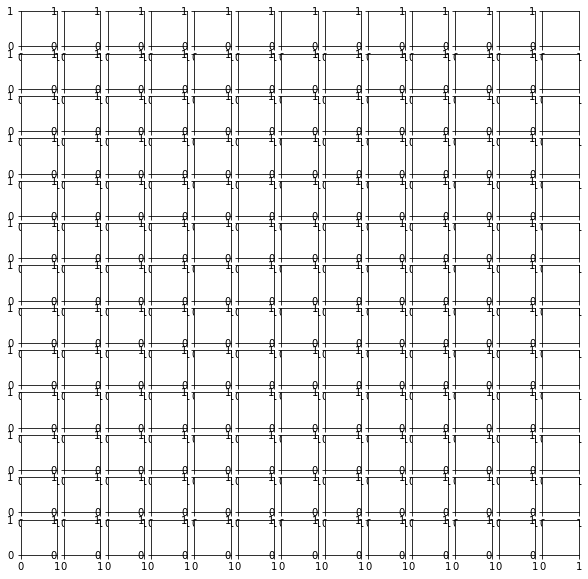

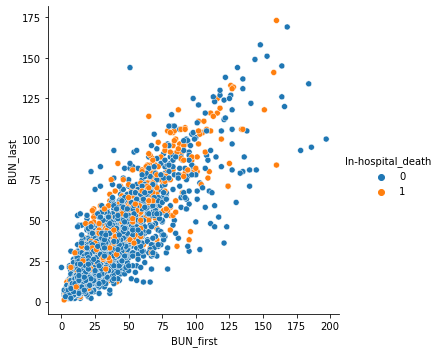

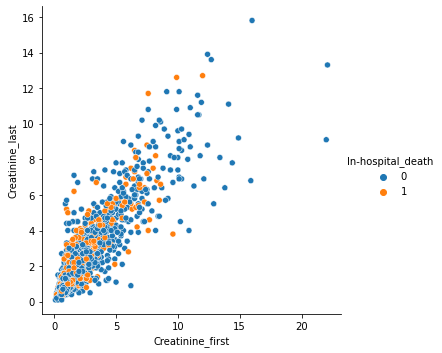

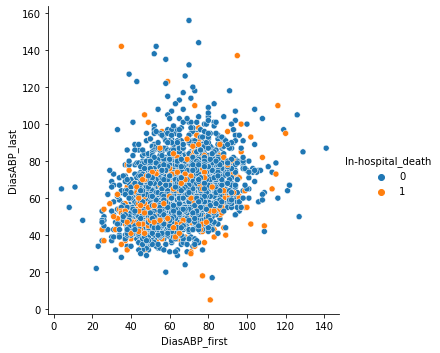

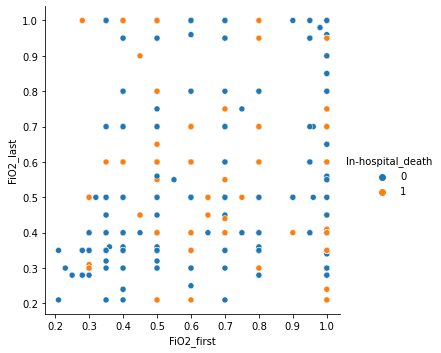

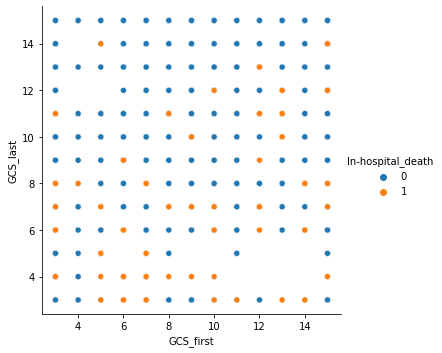

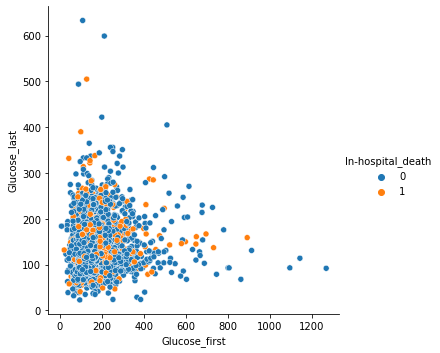

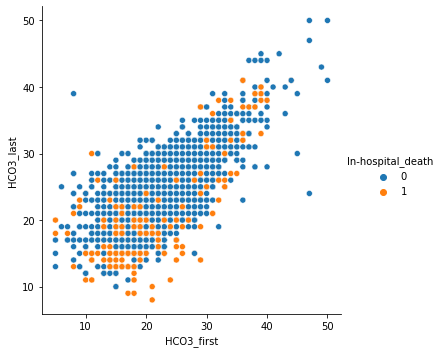

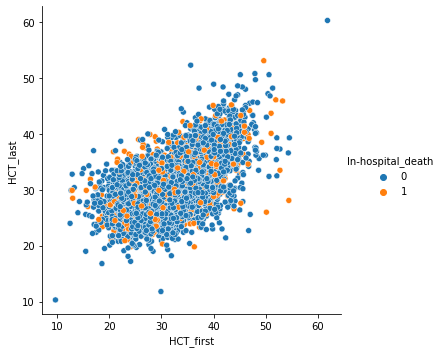

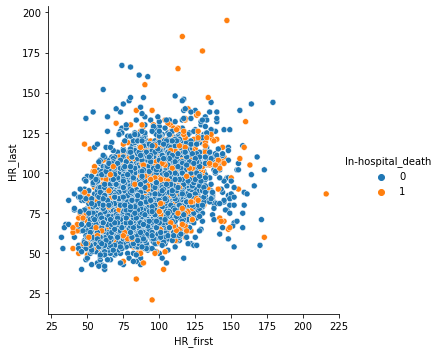

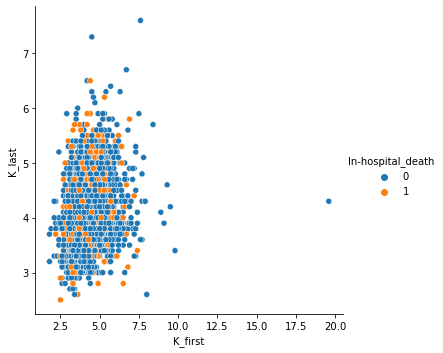

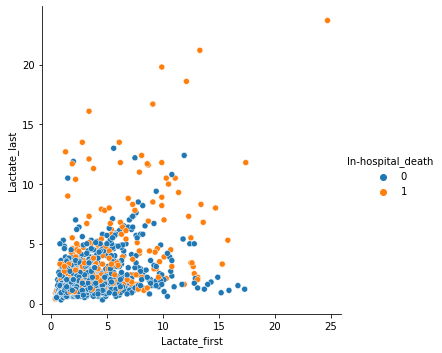

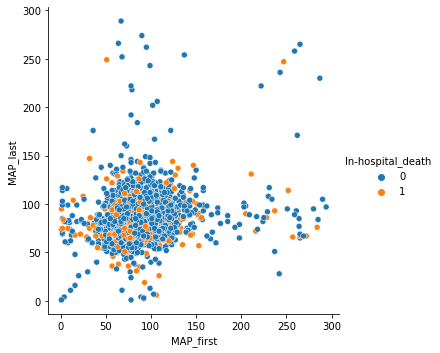

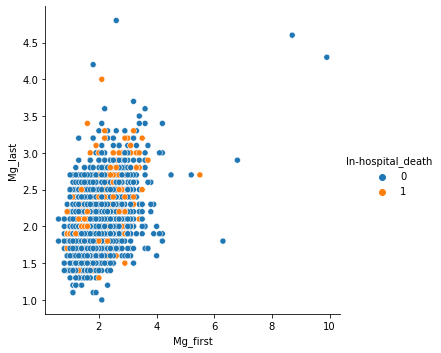

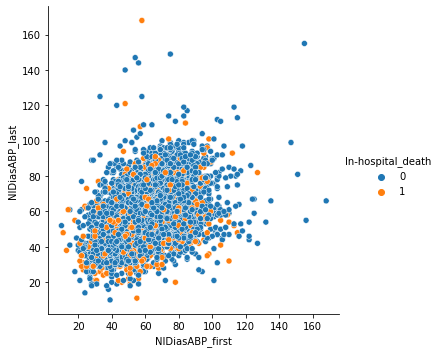

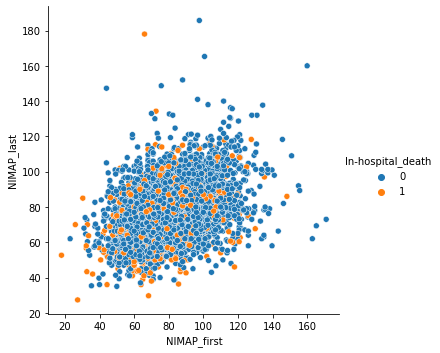

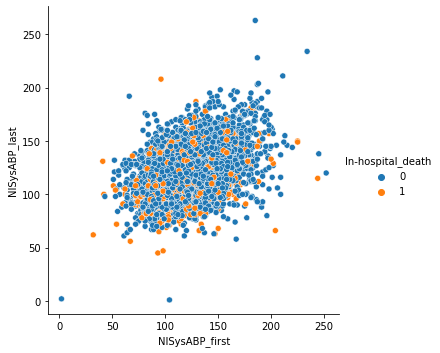

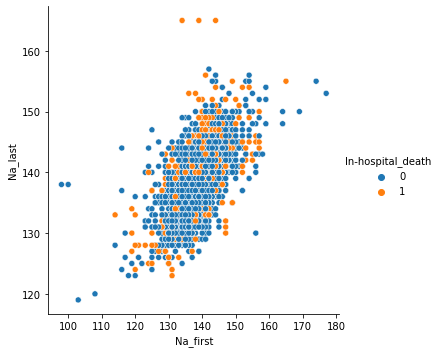

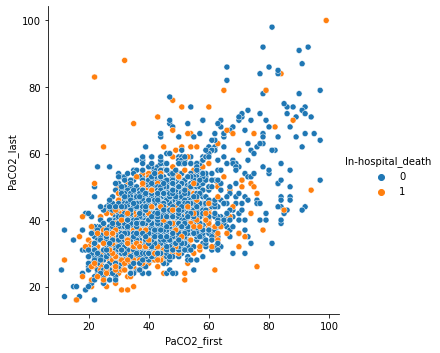

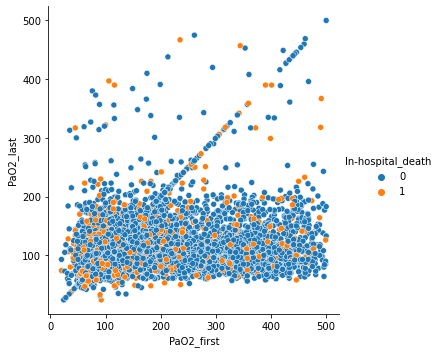

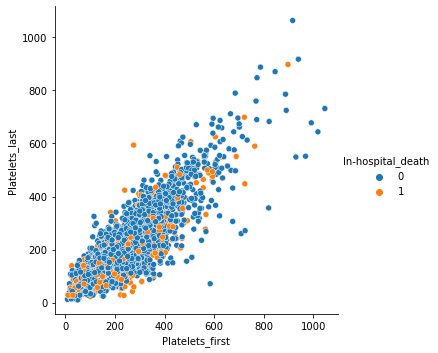

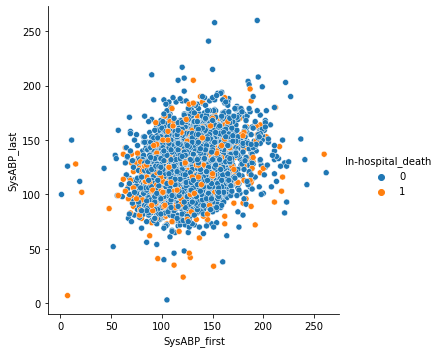

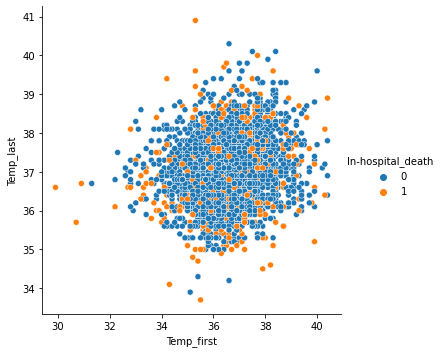

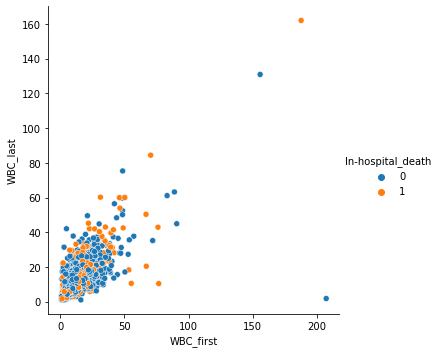

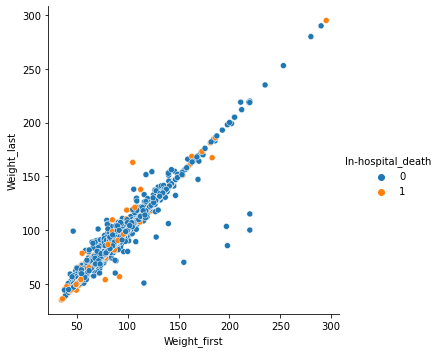

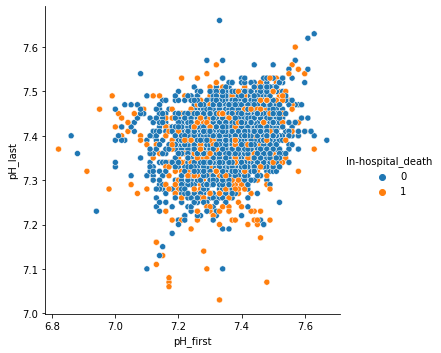

In [14]:
# Bivariate analysis of numerical variables (FIRST AND LAST)
# Interesting plot of LACTATE FIRST and LAST, gli altri mi sembrano delle ammucchiate abbastanza 
# Da qui possiamo eliminare la colonna di weight last or weight first che sta su una linea retta quindi si assomigliano molto 

fig, ax = plt.subplots(nrows=13, ncols=13, figsize=(10,10))
colonna=0
for c, col in enumerate(col_first): 
    sns.relplot(x = col, y = col_last[c], hue='In-hospital_death',data = df)




In [16]:
# Function to 1) remove highly correlated variables 2) plot the correlation heatmap 

#commento extra
def scremare_highly_correlated(df, threshold): 
    corr = df.corr()
    df_after_corr = df.copy()

    print(corr.columns)
    #print(corr.index)

    for c, col in enumerate(corr.columns): 
        for r, row in enumerate(corr.index):
            #print('corr value: '*str(corr[col][row])))
            if corr[col][row] > threshold and corr[col][row] < 1: 
                #print(': '*str(corr[col][row])))
                try: 
                    df_after_corr.drop(row, axis=1, inplace=True)
                except: 
                    print(str(row) + ' has already been removed')

    print('Before removing highly correlated columns: ' + str(len(df.columns)))
    print('After removing highly correlated columns: ' + str(len(df_after_corr.columns)))

    return df_after_corr

def plot_correlation_heatmap(df):
    plt.figure(figsize=(20,20))
    corr = df.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True, annot=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=45,

    );
    
def compute_pearson_corr(df, target): 
    from scipy.stats import pearsonr
    pearson_corr = []
    pvalues=[]
    considered_cols = []
    for col in list(df.columns): 
        df[col].fillna(value=df[col].mean(), inplace=True)
        if df[col].isnull().sum()<1: 
            corr, pval = pearsonr(df[col], target)
            considered_cols.append(col)
            pearson_corr.append(corr)
            pvalues.append(pval)
            print('Pearsons correlation: %.3f' % corr)
    print(len(pearson_corr))
    return pearson_corr, pvalues

def plot_pearson(pearson, pvalues, cols): 
    import matplotlib.patches as mpatches
    patches=[]
    colors=['#BADEFC', '#0A86EB']
    label=['Significant association', 'Not significant association']
    fig, ax = plt.subplots(figsize=(20,10))
    for i in range(len(pearson)): 
        if pvalues[i]<0.05: 
            colore=colors[0]# THERE IS STATISTICAL SIGNIFICANT ASSOCIATION BETWEEN THE VARIABLES TOP 
        else: 
            colore=colors[1]# più scuro 
        
        ax.bar(i, pearson[i], color=colore)
        ax.set_xticks(np.arange(len(pearson)), cols, rotation=45)
    ax.grid(axis='x')
    patches = [ mpatches.Patch(color=colors[a], label="{:s}".format(label[a]) ) for a in range(len(label)) ]
    ax.legend(handles=patches)
    plt.title('Pearson correlation')
    

Pearsons correlation: 0.204
Pearsons correlation: 0.096
Pearsons correlation: -0.028
Pearsons correlation: -0.012
Pearsons correlation: -0.025
Pearsons correlation: 0.061
Pearsons correlation: -0.093
Pearsons correlation: -0.002
Pearsons correlation: 0.075
Pearsons correlation: 0.007
Pearsons correlation: 0.129
Pearsons correlation: 0.000
Pearsons correlation: 0.029
Pearsons correlation: -0.035
Pearsons correlation: -0.036
Pearsons correlation: -0.032
Pearsons correlation: -0.004
Pearsons correlation: -0.046
Pearsons correlation: -0.103
Pearsons correlation: -0.023
Pearsons correlation: -0.020
Pearsons correlation: -0.021
Pearsons correlation: 0.074
Pearsons correlation: -0.045
Pearsons correlation: -0.070
Pearsons correlation: 0.245
Pearsons correlation: 0.123
Pearsons correlation: -0.046
Pearsons correlation: 0.054
Pearsons correlation: -0.344
Pearsons correlation: 0.092
Pearsons correlation: -0.180
Pearsons correlation: 0.016
Pearsons correlation: 0.073
Pearsons correlation: 0.032
P

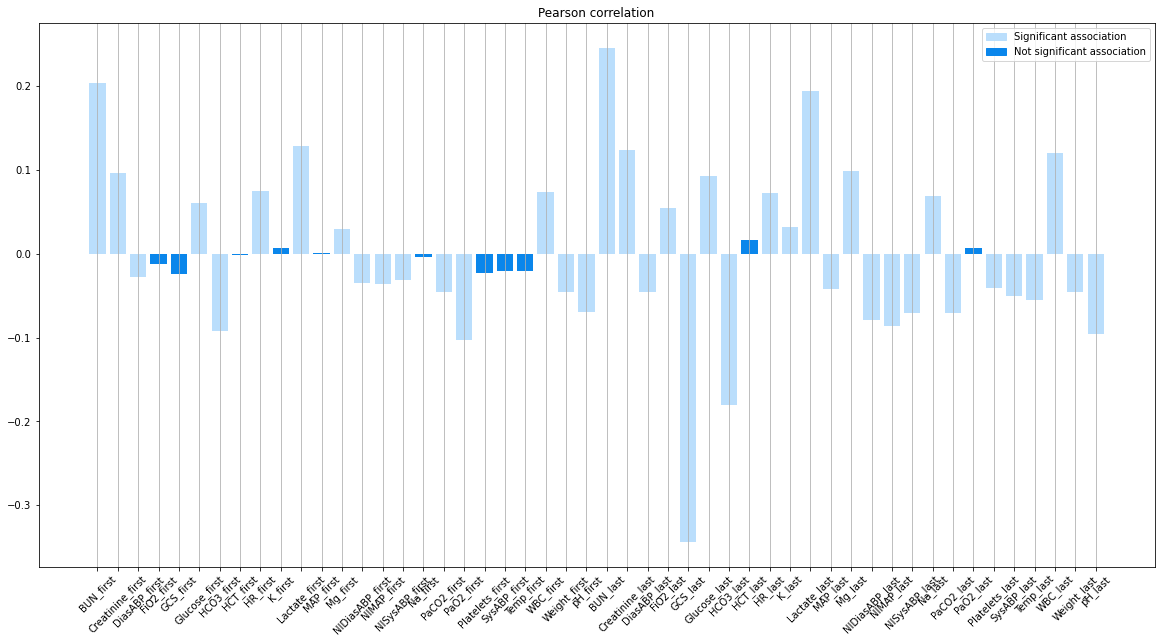

In [17]:
target = np.array(df['In-hospital_death'])
pearson_corr_firstlast, pvalues_firstlast = compute_pearson_corr(df_first_last, target)
plot_pearson(pearson_corr_firstlast, pvalues_firstlast , list(df_first_last.columns))

/usr/local/anaconda3/envs/Lab/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Pearsons correlation: 0.003
Pearsons correlation: 0.168
Pearsons correlation: 0.186
Pearsons correlation: 0.126
Pearsons correlation: 0.072
Pearsons correlation: 0.115
Pearsons correlation: 0.034
Pearsons correlation: -0.078
Pearsons correlation: 0.016
Pearsons correlation: -0.281
Pearsons correlation: -0.107
Pearsons correlation: -0.095
Pearsons correlation: -0.274
Pearsons correlation: 0.001
Pearsons correlation: 0.097
Pearsons correlation: 0.109
Pearsons correlation: -0.052
Pearsons correlation: -0.057
Pearsons correlation: -0.005
Pearsons correlation: -0.099
Pearsons correlation: -0.091
Pearsons correlation: -0.102
Pearsons correlation: -0.074
Pearsons correlation: -0.074
Pearsons correlation: -0.011
Pearsons correlation: -0.004
Pearsons correlation: -0.067
Pearsons correlation: 0.009
Pearsons correlation: -0.037
Pearsons correlation: -0.052
Pearsons correlation: -0.013
Pearsons correlation: -0.091
Pearsons correlation: -0.081
Pearsons correlation: -0.014
Pearsons correlation: -0.0

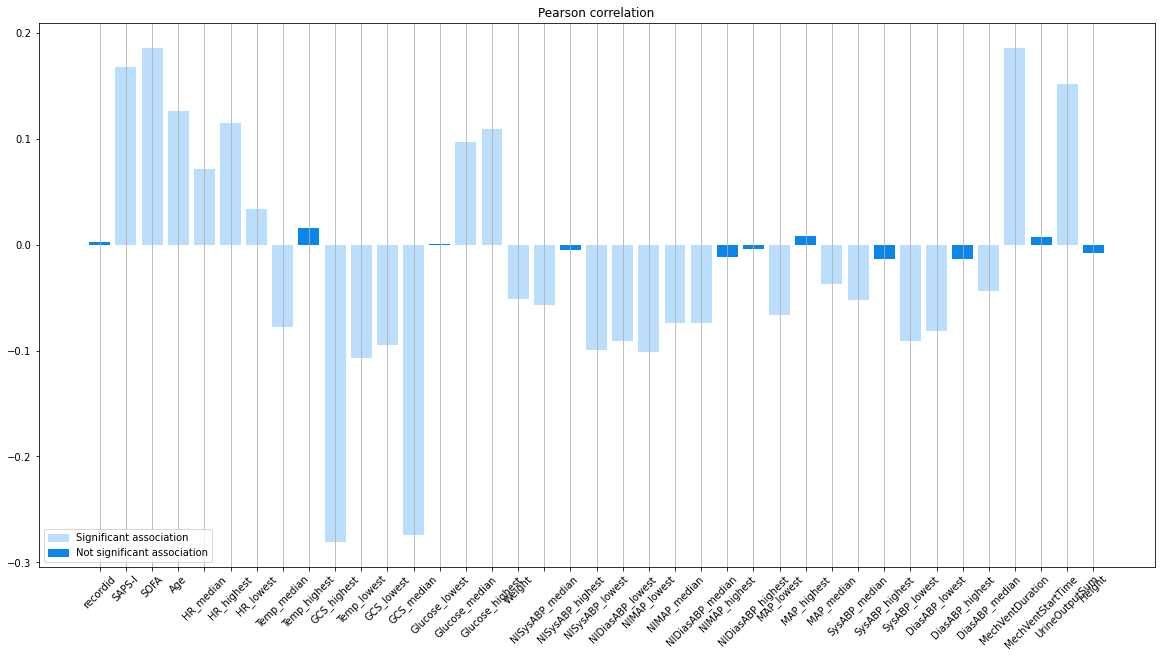

In [18]:
target = np.array(df['In-hospital_death'])
pearson_corr_single, pvalues_single= compute_pearson_corr(df_numerical_single, target)
plot_pearson(pearson_corr_single,pvalues_single, list(df_numerical_single.columns))

In [ ]:
df_first_last


In [ ]:
# Correlation between numerical variables (always only the ones that have FIRST/LAST)    
plot_correlation_heatmap(df_first_last)

In [ ]:
# Codice per rimuovere variabili con più del 0.65 di correlazione - possiamo anche modificare la treshold 
# sempre solamente tra le variabili numeriche con FIRST/LAST 
        
df_after_corr = scremare_highly_correlated(df_first_last, 0.65)

#QUI NON SAREBBE MEGLIO TOGLIERE SOLO UNA DELLE DUE?
#OPPURE TRA QUELLE CHE SONO SIGNIFICATIVAMENTE DIVERSE POTREMMO PROVARE A FARE RAPPORTO O SOTTRAZIONE first/last

C:\Users\Alice Donati\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

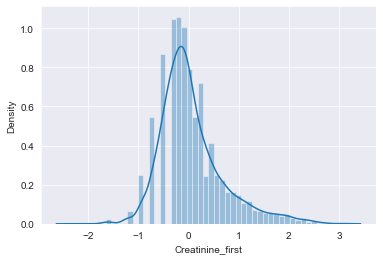

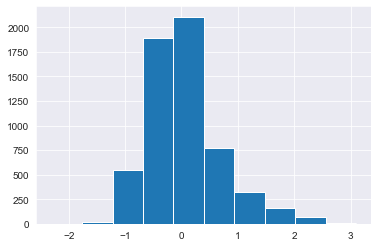

In [112]:
# Correlation between numerical variables that are remained (FIRST/LAST)
plot_correlation_heatmap(df_after_corr)

C:\Users\Alice Donati\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

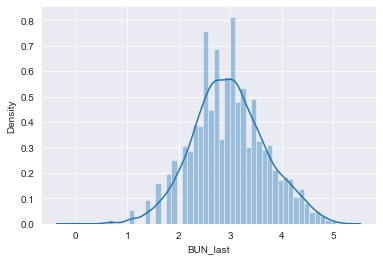

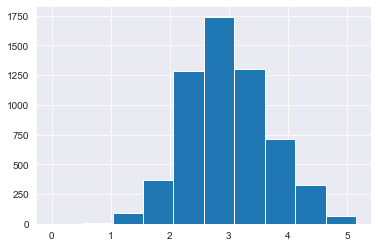

In [113]:
# Uniamo le variabili rimaste FIRST/LAST con le altre numeriche: 
df_numeriche_rimaste = pd.concat([df_after_corr, df_numerical_single], axis=1)

# again mostrare correlazione tra le variabili rimaste
plot_correlation_heatmap(df_numeriche_rimaste)
# OH MY GOD SONO ANCORA TANTISSIME, DOBBIAMO SCREMARE DI BRUTTO e poi alcune sono highly correlated 

C:\Users\Alice Donati\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Alice Donati\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OverflowError: cannot convert float infinity to integer

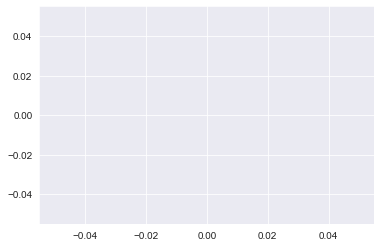

In [116]:
df_after_corr2 = scremare_highly_correlated(df_numeriche_rimaste, 0.65)
plot_correlation_heatmap(df_after_corr2)

In [114]:
#Creatinine log
import matplotlib.pyplot as plt
crea_log= np.log(numerical_df['Creatinine_first'])
sns.distplot(crea_log)
fig = plt.figure()
crea_log.hist()

NormaltestResult(statistic=7.453831357211256, pvalue=0.024066951693397634)

In [ ]:
#BUN_last log
import matplotlib.pyplot as plt
BUN_log= np.log(numerical_df['BUN_last'])
sns.distplot(BUN_log)
fig = plt.figure()
BUN_log.hist()

In [ ]:
#BUN_first log -> non capisco perchè da errore
import matplotlib.pyplot as plt
BUNf_log= np.log(numerical_df['BUN_first'])
sns.distplot(BUNf_log)
fig = plt.figure()
BUNf_log.hist()

In [ ]:
#Normality test
#Hp0: normal distribution (p-value<0.05 => reject it)
import scipy.stats as sci
for x in list(numerical_df.columns):
    y=sci.normaltest(numerical_df[x], nan_policy='omit')
    print(x, '\n', y, '\n')
print('\nProva logaritmo Creatine_first\n', sci.normaltest(crea_log, nan_policy='omit')) #not normal
print('\nProva log BUN_last\n', sci.normaltest(BUN_log, nan_policy='omit')) #normal!

In [ ]:
#For non normal (all in this case) -> Wilcoxon-Mann-Whitney test
#Hp0: are they the same?

print('BUN\n', sci.mannwhitneyu(numerical_df['BUN_first'], numerical_df['BUN_last'], nan_policy='omit'))
#same
print('\n\nCreatinine\n', sci.mannwhitneyu(numerical_df['Creatinine_first'], numerical_df['Creatinine_last'], nan_policy='omit'))
#same
print('\n\nHCT\n', sci.mannwhitneyu(numerical_df['HCT_first'], numerical_df['HCT_last'], nan_policy='omit'))
#different
print('\n\nHR\n', sci.mannwhitneyu(numerical_df['HR_first'], numerical_df['HR_last'], nan_policy='omit'))
#different
print('\n\nTemp\n', sci.mannwhitneyu(numerical_df['Temp_first'], numerical_df['Temp_last'], nan_policy='omit'))
#different
print('\n\nGCS\n', sci.mannwhitneyu(numerical_df['GCS_first'], numerical_df['GCS_last'], nan_policy='omit'))
#different
print('\n\nPlatelets\n', sci.mannwhitneyu(numerical_df['Platelets_first'], numerical_df['Platelets_last'], nan_policy='omit'))
#different
print('\n\nHCO3\n', sci.mannwhitneyu(numerical_df['HCO3_first'], numerical_df['HCO3_last'], nan_policy='omit'))
#different
print('\n\nNa\n', sci.mannwhitneyu(numerical_df['Na_first'], numerical_df['Na_last'], nan_policy='omit'))
#same
print('\n\nK\n', sci.mannwhitneyu(numerical_df['K_first'], numerical_df['K_last'], nan_policy='omit'))
#different
print('\n\nWBC\n', sci.mannwhitneyu(numerical_df['WBC_first'], numerical_df['WBC_last'], nan_policy='omit'))
#different
print('\n\nMg\n', sci.mannwhitneyu(numerical_df['Mg_first'], numerical_df['Mg_last'], nan_policy='omit'))
#different
print('\n\nGlucose\n', sci.mannwhitneyu(numerical_df['Glucose_first'], numerical_df['Glucose_last'], nan_policy='omit'))
#different
print('\n\nNISysABP\n', sci.mannwhitneyu(numerical_df['NISysABP_first'], numerical_df['NISysABP_last'], nan_policy='omit'))
#different
print('\n\nNIMAP\n', sci.mannwhitneyu(numerical_df['NIMAP_first'], numerical_df['NIMAP_last'], nan_policy='omit'))
#different
print('\n\nNIDiasABP\n', sci.mannwhitneyu(numerical_df['NIDiasABP_first'], numerical_df['NIDiasABP_last'], nan_policy='omit'))
#different
print('\n\npH\n', sci.mannwhitneyu(numerical_df['pH_first'], numerical_df['pH_last'], nan_policy='omit'))
#different
print('\n\nPaO2\n', sci.mannwhitneyu(numerical_df['PaO2_first'], numerical_df['PaO2_last'], nan_policy='omit'))
#different
print('\n\nPaCO2\n', sci.mannwhitneyu(numerical_df['PaCO2_first'], numerical_df['PaCO2_last'], nan_policy='omit'))
#different
print('\n\nMAP\n', sci.mannwhitneyu(numerical_df['MAP_first'], numerical_df['MAP_last'], nan_policy='omit'))
#different
print('\n\nSysABP\n', sci.mannwhitneyu(numerical_df['SysABP_first'], numerical_df['SysABP_last'], nan_policy='omit'))
#different
print('\n\nDiasABP\n', sci.mannwhitneyu(numerical_df['DiasABP_first'], numerical_df['DiasABP_last'], nan_policy='omit'))
#different
print('\n\nWeight\n', sci.mannwhitneyu(numerical_df['Weight_first'], numerical_df['Weight_last'], nan_policy='omit'))
#same
print('\n\nFiO2\n', sci.mannwhitneyu(numerical_df['FiO2_first'], numerical_df['FiO2_last'], nan_policy='omit'))
#different
print('\n\nLactate\n', sci.mannwhitneyu(numerical_df['Lactate_first'], numerical_df['Lactate_last'], nan_policy='omit'))
#different

In [ ]:
# Merging categorical and numerical together
#print(dummies.shape)
#print(X_numerical.shape)
#dummies.tail()

#X=pd.concat([dummies,X_numerical], axis = 1)
#X.tail()

In [ ]:
# Separating train - test data


In [ ]:
# Once we have final X, y
def save_variables():
    print(0)

save_variables(X, fn, 'X')
save_variables(y, fn, 'y')

MannwhitneyuResult(statistic=19870854.0, pvalue=1.479965468395165e-41)

In [ ]:
# Merging categorical and numerical together
#print(dummies.shape)
#print(X_numerical.shape)
#dummies.tail()

#X=pd.concat([dummies,X_numerical], axis = 1)
#X.tail()

In [ ]:
# Separating train - test data
